In [1]:
#https://www.kaggle.com/datasets/datamunge/sign-language-mnist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.linear_model import LogisticRegression

In [2]:
sign_mnist_df = pd.read_csv('sign_mnist_train.csv')

In [3]:
sign_mnist_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
sign_mnist_df.shape

(27455, 785)

In [5]:
sign_mnist_df = sign_mnist_df.dropna()
sign_mnist_df[sign_mnist_df.isnull().any(axis=1)].count()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [6]:
sign_mnist_df.shape

(27455, 785)

In [7]:
sign_mnist_df=sign_mnist_df.sample(frac=0.3).reset_index(drop=True)
sign_mnist_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,19,170,170,173,173,173,174,174,174,175,...,201,201,200,201,200,201,182,136,111,99
1,4,144,149,152,155,158,160,164,167,169,...,194,214,109,60,58,64,36,32,44,62
2,16,125,132,138,141,143,147,152,156,160,...,104,133,123,116,108,103,104,109,105,103
3,4,156,156,156,157,157,156,155,154,155,...,13,5,33,173,166,167,166,164,164,164
4,10,28,62,78,81,83,87,90,97,108,...,162,125,105,105,109,109,106,104,103,103


In [8]:
sign_mnist_df.shape

(8236, 785)

In [9]:
LOOKUP = {0: 'A', 
          1: 'B', 
          2: 'C', 
          3: 'D', 
          4: 'E',
          5: 'F', 
          6: 'G', 
          7: 'H', 
          8: 'I',
          #no 9
          10: 'K', 
          11: 'L', 
          12: 'M', 
          13: 'N', 
          14: 'O', 
          15: 'P', 
          16: 'Q', 
          17: 'R', 
          18: 'S', 
          19: 'T', 
          20: 'U', 
          21: 'V', 
          22: 'W', 
          23: 'X', 
          24: 'Y'}

In [10]:
def display_image(features, actual_label):
    print("Actual label: ", LOOKUP[actual_label])
    plt.imshow(features.reshape(28,28))

In [11]:
X=sign_mnist_df[sign_mnist_df.columns[1:]]
Y=sign_mnist_df['label'] #<=> ce qu'on veut prédire

In [12]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,170,170,173,173,173,174,174,174,175,175,...,201,201,200,201,200,201,182,136,111,99
1,144,149,152,155,158,160,164,167,169,173,...,194,214,109,60,58,64,36,32,44,62
2,125,132,138,141,143,147,152,156,160,163,...,104,133,123,116,108,103,104,109,105,103
3,156,156,156,157,157,156,155,154,155,154,...,13,5,33,173,166,167,166,164,164,164
4,28,62,78,81,83,87,90,97,108,119,...,162,125,105,105,109,109,106,104,103,103


In [13]:
Y.head()

0    19
1     4
2    16
3     4
4    10
Name: label, dtype: int64

Actual label:  T


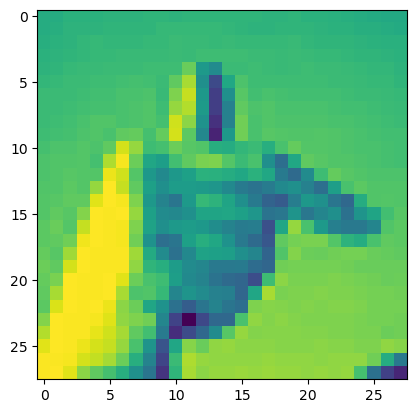

In [14]:
display_image(X.loc[0].values, Y.loc[0])

Actual label:  O


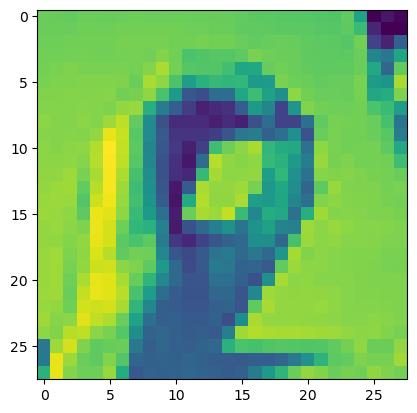

In [15]:
display_image(X.loc[156].values, Y.loc[156])

In [16]:
X=X/255 #range 0 to 1 (its common + speed..) = normalisation
#Each parameter (red, green, and blue) defines the intensity of the color with a value between 0 and 255
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.666667,0.666667,0.678431,0.678431,0.678431,0.682353,0.682353,0.682353,0.686275,0.686275,...,0.788235,0.788235,0.784314,0.788235,0.784314,0.788235,0.713725,0.533333,0.435294,0.388235
1,0.564706,0.584314,0.596078,0.607843,0.619608,0.627451,0.643137,0.654902,0.662745,0.678431,...,0.760784,0.839216,0.427451,0.235294,0.227451,0.250980,0.141176,0.125490,0.172549,0.243137
2,0.490196,0.517647,0.541176,0.552941,0.560784,0.576471,0.596078,0.611765,0.627451,0.639216,...,0.407843,0.521569,0.482353,0.454902,0.423529,0.403922,0.407843,0.427451,0.411765,0.403922
3,0.611765,0.611765,0.611765,0.615686,0.615686,0.611765,0.607843,0.603922,0.607843,0.603922,...,0.050980,0.019608,0.129412,0.678431,0.650980,0.654902,0.650980,0.643137,0.643137,0.643137
4,0.109804,0.243137,0.305882,0.317647,0.325490,0.341176,0.352941,0.380392,0.423529,0.466667,...,0.635294,0.490196,0.411765,0.411765,0.427451,0.427451,0.415686,0.407843,0.403922,0.403922


In [17]:
x_train, x_test, y_train, y_test=train_test_split(X, Y,test_size=0.2)

In [18]:
x_train.shape, y_train.shape

((6588, 784), (6588,))

In [19]:
x_test.shape, y_test.shape

((1648, 784), (1648,))

# LogisticRegression

In [20]:
logistic_model = LogisticRegression(solver='saga', multi_class='auto', max_iter=5000).fit(x_train, y_train)

In [21]:
y_pred = logistic_model.predict(x_test)

In [22]:
print("Accuracy: ",accuracy_score(y_test,y_pred,normalize=True))
print("Precision: ",precision_score(y_test, y_pred, average='weighted'))
print("Recall: ",recall_score(y_test, y_pred, average='weighted'))

Accuracy:  0.9927184466019418
Precision:  0.9928267461669346
Recall:  0.9927184466019418


In [23]:
logistic_model.predict([x_test.loc[4926]])

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([18], dtype=int64)

In [24]:
LOOKUP[23]

'X'

## Hyperparameter tuning using GridSearch

In [25]:
from sklearn.model_selection import GridSearchCV
parameters = {'solver': ['saga','sag']}
grid_search = GridSearchCV(LogisticRegression(multi_class='auto', max_iter=5000), parameters, cv=3, return_train_score=True).fit(x_train, y_train)
grid_search.best_params_

{'solver': 'sag'}

In [26]:
y_pred = grid_search.predict(x_test)

In [28]:
print("Accuracy: ",accuracy_score(y_test,y_pred,normalize=True))
print("Precision: ",precision_score(y_test, y_pred, average='weighted'))
print("Recall: ",recall_score(y_test, y_pred, average='weighted'))

Accuracy:  0.9933252427184466
Precision:  0.9934096962606155
Recall:  0.9933252427184466


# NaiveBayes

In [29]:
from sklearn.naive_bayes import GaussianNB

In [30]:
nb_model = GaussianNB().fit(x_train, y_train)

In [31]:
y_pred = nb_model.predict(x_test)

In [32]:
print("Accuracy: ",accuracy_score(y_test,y_pred,normalize=True))
print("Precision: ",precision_score(y_test, y_pred, average='weighted'))
print("Recall: ",recall_score(y_test, y_pred, average='weighted'))

Accuracy:  0.4496359223300971
Precision:  0.5048215307082462
Recall:  0.4496359223300971
